一个简单的例子

In [62]:
import numpy as np
import operator

def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    #四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels

def classify0(inX, dataSet, labels, k):
    #生成当前点x和数据集中数据的距离，并且排序
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDistances = (diffMat**2).sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        classCount[voteIlabel] = classCount.get(voteIlabel, 0)+1
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

if __name__ == '__main__':
    group, labels = createDataSet()
    test = [101,20]
    test_class = classify0(test, group, labels, 3)
    print(test_class)

动作片


获取数据集的多种方式

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit
import numpy as np

load=load_iris()
X = load.data
y = load.target

#简单的数据分类
X_train, X_test, y_train, y_test = train_test_split(load.data, load.target, test_size=0.2)

#交叉验证
#k折交叉验证
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
#p次k折交叉验证
rkf = RepeatedKFold(n_splits = 10, n_repeats = 10)
for train_index, test_index in rkf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
#留一法
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
#留P法
lpo = LeavePOut(p = 2)  #循环次数等于测试数据的排列组合
for train_index, test_index in lpo.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
#随机分配
ss = ShuffleSplit(n_splits=4, random_state=0, test_size=0.2)
for train_index, test_index in ss.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

展示数据特征之间关系的函数、对数据进行归一化的函数

In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from itertools import combinations

def showdatas(datingDataMat, datingLabels):
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(20,12))
    Features = {0:'sepal length', 1:'sepal width', 2:'petal length', 3:'petal width'}
    FeaturesComb = list(combinations([0,1,2,3], 2))
    index = 0
    ColorLabel = []
    for i in datingLabels:
        if i == 0:
            ColorLabel.append('red')
        elif i == 1:
            ColorLabel.append('blue')
        elif i == 2:
            ColorLabel.append('green')    
    #设置图例
    Iris_Setosa = mlines.Line2D([], [], color='red', marker='.', markersize=6, label='Iris Setosa')
    Iris_Versicolour = mlines.Line2D([], [], color='blue', marker='.', markersize=6, label='Iris Versicolour')
    Iris_Virginica = mlines.Line2D([], [], color='green', marker='.', markersize=6, label='Iris Virginica')
    #画出散点图,散点大小为15,透明度为0.5
    for i in range(2):
        for j in range(3):
            x, y = FeaturesComb[index]
            index += 1
            axs[i][j].scatter(datingDataMat[:,x], datingDataMat[:,y], c=ColorLabel, s=15, alpha=.5)
            axs[i][j].legend(handles=[Iris_Setosa, Iris_Versicolour, Iris_Virginica])
            axs0_title_text = axs[i][j].set_title(Features[x]+' and '+Features[y])
            axs0_xlabel_text = axs[i][j].set_xlabel(Features[x])
            axs0_ylabel_text = axs[i][j].set_ylabel(Features[y])
            plt.setp(axs0_title_text, size=11, weight='bold', color='red') 
            plt.setp(axs0_xlabel_text, size=11, weight='bold', color='black') 
            plt.setp(axs0_ylabel_text, size=11, weight='bold', color='black')
    plt.show()

def autoNorm(dataSet):
    minVals = dataSet.min(0)
    return (dataSet-minVals) / (dataSet.max(0)-minVals)

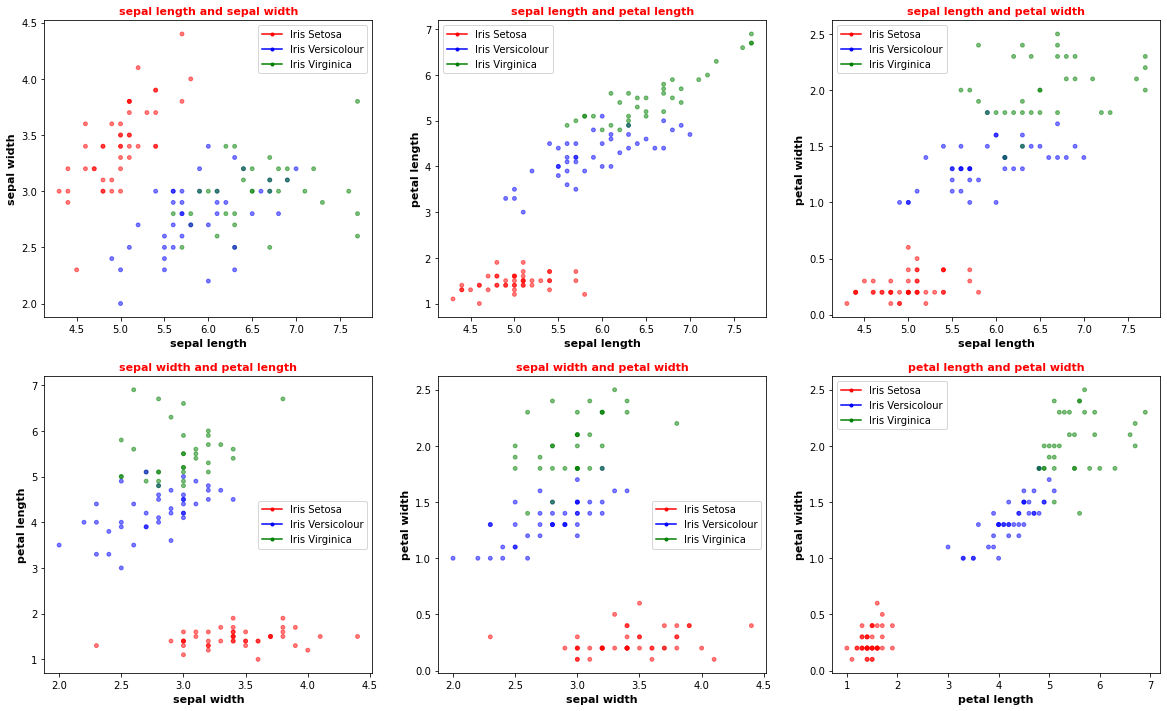

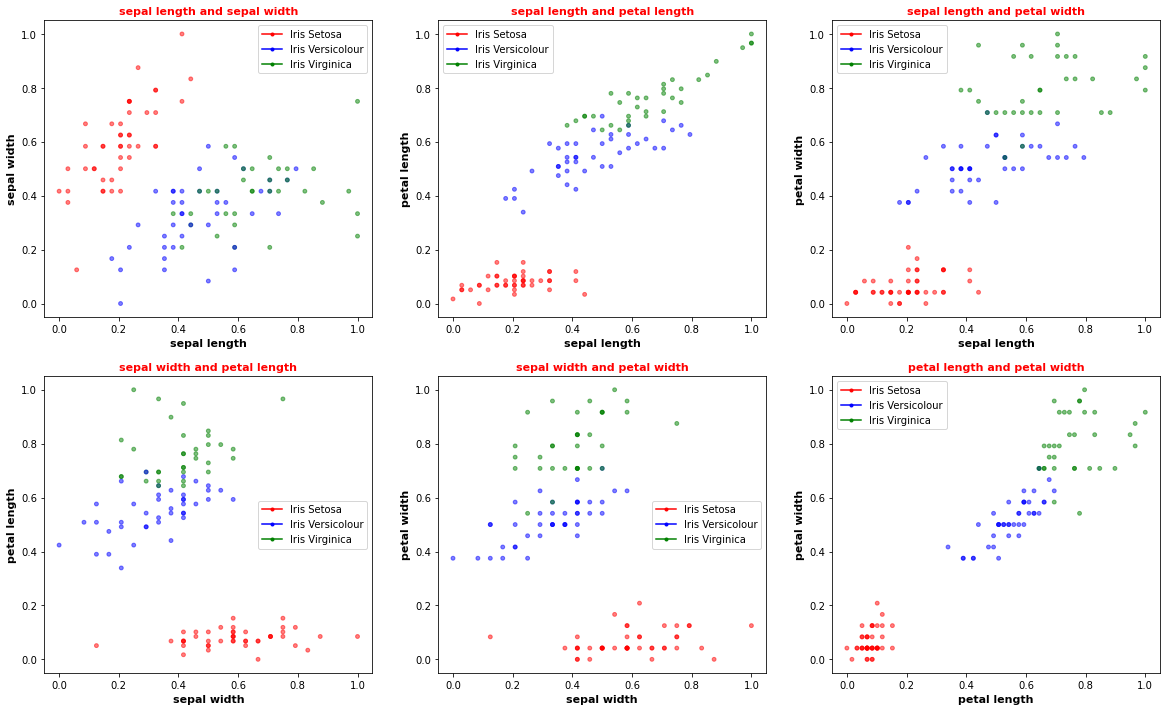

In [65]:
load=load_iris()
X_train, X_test, y_train, y_test = train_test_split(load.data, load.target, test_size=0.2)
X_train_nomal = autoNorm(X_train)
X_test_nomal = autoNorm(X_test)
showdatas(X_train, y_train)
showdatas(X_train_nomal, y_train)

k近邻函数
测试函数

In [66]:
def classify0(inX, dataSet, labels, k):
    diffMat = np.tile(inX, (dataSet.shape[0], 1))-dataSet
    sqDistances = (diffMat**2).sum(axis=1)
    sortedDistIndices = (sqDistances**0.5).argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    return max(classCount, key=lambda x: classCount[x])

def getEffect(testData, testLabel, dataSet, labels, k):
    count = 0
    for (data, label) in zip(testData, testLabel):
        if classify0(data, dataSet, labels, k) == label:
            count += 1
    return count/len(testLabel)

In [71]:
for k in range(1, 10):
    print('k为', k, '时的正确率为：', getEffect(X_test_nomal, y_test, X_train_nomal, y_train, k))

k为 1 时的正确率为： 0.9333333333333333
k为 2 时的正确率为： 0.9333333333333333
k为 3 时的正确率为： 0.9333333333333333
k为 4 时的正确率为： 0.9333333333333333
k为 5 时的正确率为： 0.9333333333333333
k为 6 时的正确率为： 0.9333333333333333
k为 7 时的正确率为： 0.9333333333333333
k为 8 时的正确率为： 0.9333333333333333
k为 9 时的正确率为： 0.9333333333333333


b
